[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alessandronascimento/BioMolComp/blob/main/P06/PredicaoEstruturas1.ipynb)

# Predição de Estruturas Proteicas #

Nesta prática faremos a predição da estrutra de algumas estruturas de proteínas a partir da sequência.

Usaremos dois métodos diferentes para a predição da estrutura. O primeiro método é o método da Satisfação de Restrições Espaciais, como proposto por  [Sali e Blundell (1993)](https://salilab.org/pdf/Sali_JMolBiol_1993.pdf). O segundo método, mais recente, emprega a aprendizagem de máquina para a modelagem da estrutura de proteínas.

## Proteína Alvo ##

Nossa sequência alvo está mostrada no quadro abaixo. Sabemos que trata-se de uma enzima da família das glicosiltransferases e é uma enzima bacteriana.

```
>EOL33614.1
MKVLLIIPAYNEEENILRTIASIETFKQEVTHFQHELDYVVINDGSTDGTKQILEVNQINAIHLVLNLGI
GGAVQTGYKYALENEYDVAVQFDGDGQHDINSLPILLEPLAEGKCDFSIGSRFIPGNEAAFQSTKMRRFG
IRLLSFCIRMASGKTIYDVTSGYRAGNRKVIAFFAKRYPTNYPEPESIVHLIKKRFVIVERPVNMMERLG
GVSSIRALASVKYMLEVGSAILIAAFMKEGD
```

A primeira etapa da nossa análise envolve a busca por sequências homólogas com estrutura conhecida. Isto pode ser feito usando o [BLAST](blast.ncbi.nlm.nih.gov/), uma vez que o banco de dados de estruturas de proteínas (PDB) é uma das opções de busca no programa BLAST.

## Consulta ao PDB ##

Como nós já sabemos como usar o BLAST no Biopython, faremos isso usando esta ferramenta. 

A primeira etapa consiste em: 
importar as bibliotecas necessárias

*   instalar o Biopython e
*   importar as bibliotecas necessárias.

In [ ]:
#@title Preparando o Ambiente para a Execução

!pip3 install biopython

from Bio import SeqIO
from Bio.Seq import Seq
from Bio import Entrez
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

A segunda etapa consiste em realizar a consulta via internet com o BLAST. Observe que:


1.   Nossa consulta é feita com o **BLASTP** (programa para consulta de sequências de proteínas);
2.   Usamos a base de dados "**pdb**" como base onde vamos realizar a consulta;
3.   Convertemos nosso string de caracteres em uma sequência biologica (*Seq(raw_seq)*) e usamos esta sequência na busca;
4.   Como fizemos anteriormente, salvamos o resultado da nossa busca como um arquivo XML que será processado posteriormente.

In [ ]:
raw_seq = "MKVLLIIPAYNEEENILRTIASIETFKQEVTHFQHELDYVVINDGSTDGTKQILEVNQINAIHLVLNLGIGGAVQTGYKYALENEYDVAVQFDGDGQHDINSLPILLEPLAEGKCDFSIGSRFIPGNEAAFQSTKMRRFGIRLLSFCIRMASGKTIYDVTSGYRAGNRKVIAFFAKRYPTNYPEPESIVHLIKKRFVIVERPVNMMERLGGVSSIRALASVKYMLEVGSAILIAAFMKEGD" #@param {type:"string"}
my_seq = Seq(raw_seq)
result_handle = NCBIWWW.qblast("blastp", "pdb", my_seq)
ith open("my_blast.xml", "w") as out_handle:
  out_handle.write(result_handle.read())
result_handle.close()

result_handle = open("my_blast.xml")
blast_record = NCBIXML.read(result_handle)

Finalmente, vamos analisar o resultado da nossa busca com o Biopython. Neste processamento, vamos filtrar os resultados de mais alta significância (E-value <= $1 \times 10^{-5}$).

Os resultados mais significativos serão mostrados (título, comprimento, e-value e alinhamento).

In [ ]:
E_VALUE_THRESH = 1E-5

for alignment in blast_record.alignments:
  for hsp in alignment.hsps:
    if hsp.expect < E_VALUE_THRESH:
      print()
      print("****Alignment****")
      print("sequence:", alignment.title)
      print("length:", alignment.length)
      print("e value:", hsp.expect)
      print(hsp.query[0:75] + "...")
      print(hsp.match[0:75] + "...")
      print(hsp.sbjct[0:75] + "...")
      print()

**Q1: Considerando que duas sequências podem ser consideradas homólogas quando temos uma identidade de sequência >= 30%, quantos homólogos foram identificados para a nossa sequência-alvo no PDB ? Você considera os alvos encontrados (caso seja o caso) alvos que podem ser empregados para a construção de um modelo da nossa sequência-alvo? Por que?**

## Relação Entre Similaridade de Sequência e de Estrutura ##

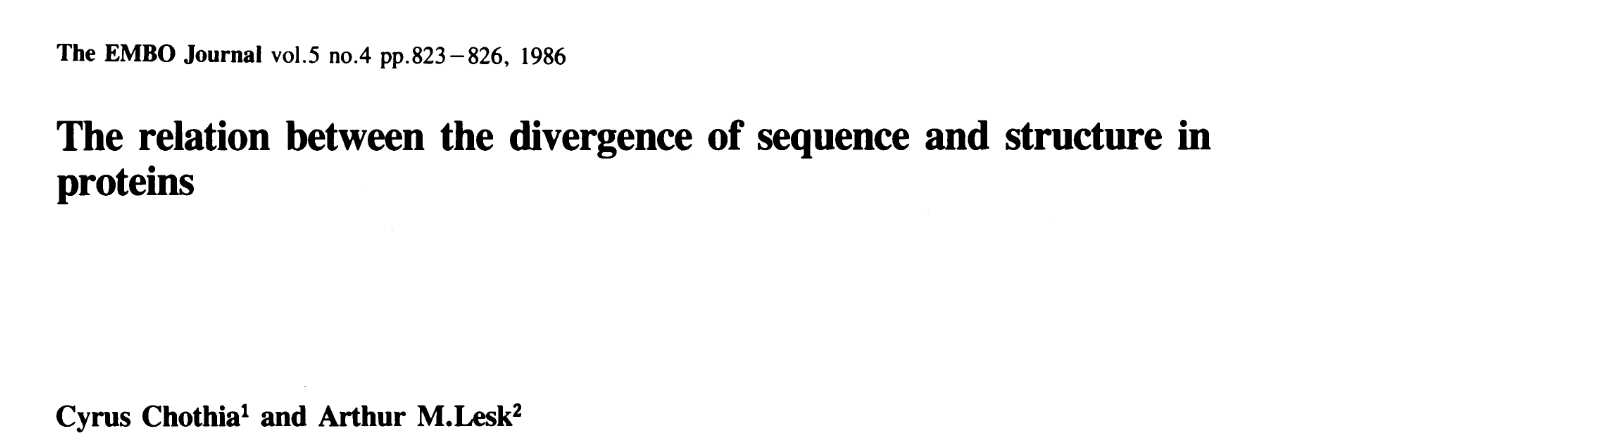

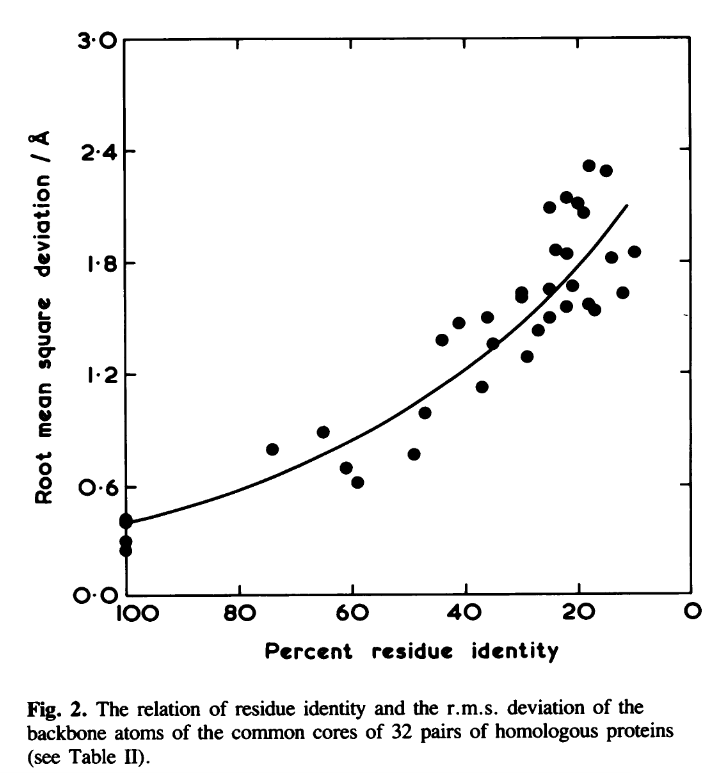